# 使用套件

In [1]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
#import lightgbm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
mport matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline



In [6]:
df = pd.read_csv("C:/Users/Windows/Downloads/heart_failure_clinical_records_dataset.csv")
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# 預處理

In [7]:
'Data Preprocessing 預處理'
'重新排列'
df = df.rename(columns={'smoking' : 'smk',
                        'diabetes' : 'dia',
                        'anaemia' : 'anm',
                        'platelets' : 'plt',
                        'high_blood_pressure' : 'hbp',
                        'creatinine_phosphokinase' : 'cpk',
                        'ejection_fraction' : 'ejf',
                        'serum_creatinine' : 'scr',
                        'serum_sodium' : 'sna',
                        'DEATH_EVENT' : 'death'})
 

df['chk'] = 1
df['sex'] = df['sex'] = df['sex'].apply(lambda x: 'Female' if x==0 else 'Male')
df['smk'] = df['smk'].apply(lambda x: 'No' if x==0 else 'Yes')
df['dia'] = df['dia'].apply(lambda x: 'No' if x==0 else 'Yes')
df['anm'] = df['anm'].apply(lambda x: 'No' if x==0 else 'Yes')
df['hbp'] = df['hbp'].apply(lambda x: 'No' if x==0 else 'Yes')
df['death'] = df['death'].apply(lambda x: 'No' if x==0 else 'Yes')
df.info()
' sex ， dia ， anm ， hbp ， smk ， death 的类别特征( object )'
'age ， plt ， cpk ， ejf ， scr ， time ， sna 的数字功能(Int64 ， float64)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     299 non-null    float64
 1   anm     299 non-null    object 
 2   cpk     299 non-null    int64  
 3   dia     299 non-null    object 
 4   ejf     299 non-null    int64  
 5   hbp     299 non-null    object 
 6   plt     299 non-null    float64
 7   scr     299 non-null    float64
 8   sna     299 non-null    int64  
 9   sex     299 non-null    object 
 10  smk     299 non-null    object 
 11  time    299 non-null    int64  
 12  death   299 non-null    object 
 13  chk     299 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 32.8+ KB


'age ， plt ， cpk ， ejf ， scr ， time ， sna 的数字功能(Int64 ， float64)'

In [8]:
'summary'
print(df.describe().round(2))
print(df['age'].describe().round(2))
'患者年齡平均為60歲，大多數患者位於 [40,70)，力衰竭後的隨訪時間也從4天到285天不等，平均130天'

print(df['plt'].describe().round(2))
'血小板是一種負責修復受損血管的血細胞。正常人計數為 [150,000，400,000] kiloplatelets/mL'
'25%-75% 的患者血小板計數在此範圍內(第1四分位數到大3四分位數)'

print(df['ejf'].describe().round(2))
'射血分數衡量每次收縮時從心室泵出多少血液的指標，健康成人中，該分數為 55%，射血分數降低的心力衰竭意味著該值 < 40%'
'75% 的患者，這個值都 < 45% (有心力衰竭的症狀)'

print(df['cpk'].describe().round(2))
'肌酐磷酸激酶，是一種存在於血液中的酶，有助於修復受損組織。高水平的 CPK 意味著心力衰竭或受傷。'
'男性的正常水平為 55-170 mcg/L，女性為 30-135 mcg/L'
'此資料的患者都有心力衰竭的現象，平均值為 550 平均和中位數都 > 135L，中位數為 250 mcg/L，都高於正常值'

print(df['scr'].describe().round(2))
'血清肌酐，被腎臟過濾，水平升高表明心輸出量差和可能的腎功能衰竭，正常值 [0.84，1.21] mcg/L'
'平均值跟中位數都高於 1.10 mg / dL，接近正常範圍的上限'

print(df['sna'].describe().round(2))
'血清鈉，是指血液中的鈉水平，> 135 mEq/L 的高水平稱為高鈉血症，這在心力衰竭患者中被認為是典型的'
'平均和中位數都 > 135 mEq/L'

          age      cpk     ejf        plt     scr     sna    time    chk
count  299.00   299.00  299.00     299.00  299.00  299.00  299.00  299.0
mean    60.83   581.84   38.08  263358.03    1.39  136.63  130.26    1.0
std     11.89   970.29   11.83   97804.24    1.03    4.41   77.61    0.0
min     40.00    23.00   14.00   25100.00    0.50  113.00    4.00    1.0
25%     51.00   116.50   30.00  212500.00    0.90  134.00   73.00    1.0
50%     60.00   250.00   38.00  262000.00    1.10  137.00  115.00    1.0
75%     70.00   582.00   45.00  303500.00    1.40  140.00  203.00    1.0
max     95.00  7861.00   80.00  850000.00    9.40  148.00  285.00    1.0
count    299.00
mean      60.83
std       11.89
min       40.00
25%       51.00
50%       60.00
75%       70.00
max       95.00
Name: age, dtype: float64
count       299.00
mean     263358.03
std       97804.24
min       25100.00
25%      212500.00
50%      262000.00
75%      303500.00
max      850000.00
Name: plt, dtype: float64
count    29

'平均和中位數都 > 135 mEq/L'

<AxesSubplot:>

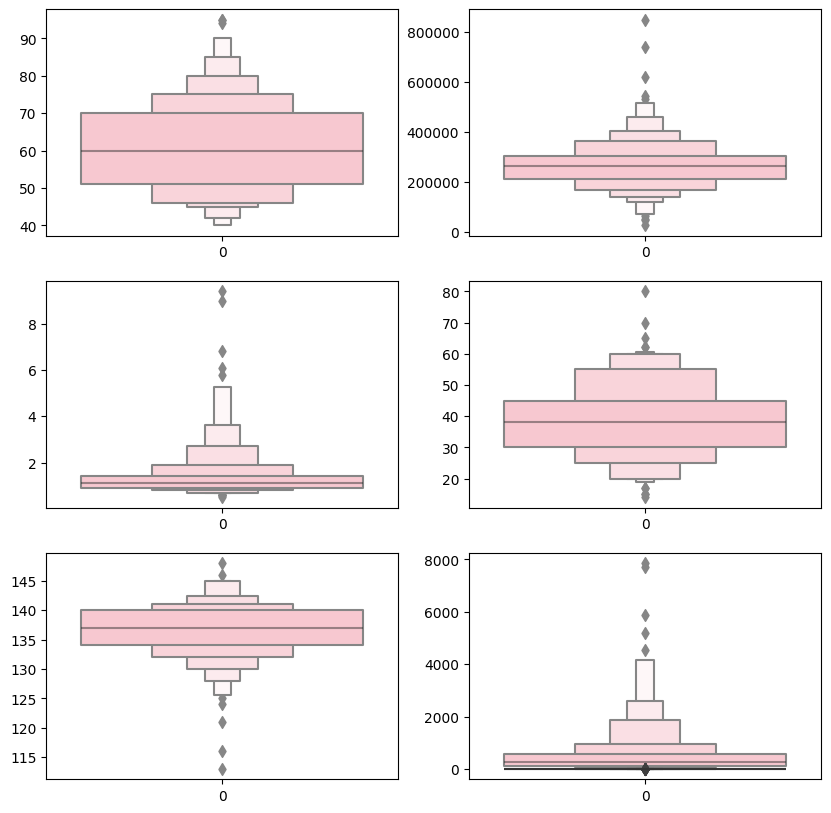

In [9]:
'box_plot'
fig,ax = plt.subplots(3,2,figsize=[10,10])
num_features_set1 = ['age', 'scr', 'sna']
num_features_set2 = ['plt', 'ejf', 'cpk']
for i in range(0,3):
    sns.boxenplot(df[num_features_set1[i]], ax=ax[i,0], color='Pink')
    sns.boxenplot(df[num_features_set2[i]], ax=ax[i,1], color='Pink')

sns.boxenplot(df['scr'])

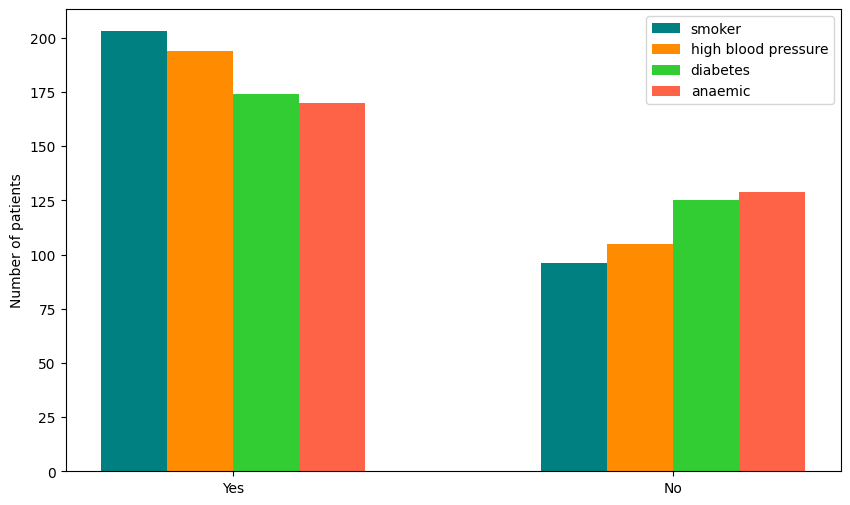

In [10]:
'bar_plot'
'分類特徵的患者數量'
fig = plt.subplots(figsize=[10,6])

bar1 = df.smk.value_counts().values
bar2 = df.hbp.value_counts().values
bar3 = df.dia.value_counts().values
bar4 = df.anm.value_counts().values
ticks = np.arange(0,3, 2)
width = 0.3
plt.bar(ticks, bar1, width=width, color='teal', label='smoker')
plt.bar(ticks+width, bar2, width=width, color='darkorange', label='high blood pressure')
plt.bar(ticks+2*width, bar3, width=width, color='limegreen', label='diabetes')
plt.bar(ticks+3*width, bar4, width=width, color='tomato', label='anaemic')
plt.xticks(ticks+1.5*width, ['Yes', 'No'])
plt.ylabel('Number of patients')
plt.legend()

In [18]:
'Cross table'
print("smk and death")
pd.crosstab(index=df['smk'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True)
print(pd.crosstab(index=df['smk'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100)
'心力衰竭患者中有 68% 不吸煙，而 32% 吸煙'
'在死者中，69% 是不吸煙者，而 31% 是吸煙者。在倖存者中，67% 為非吸煙者，33% 為吸煙者'
print('很難說，吸煙的心力衰竭患者有更大的死亡機會')

print('*********************************')
print("anm and death")
pd.crosstab(index=df['anm'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True)
print(pd.crosstab(index=df['anm'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100)
print('死亡的患者中有 48% 患有貧血症，而倖存的患者中有 41% 也患有貧血症')

print('*********************************')
print("sex and death")
pd.crosstab(index=df['sex'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True)
print(pd.crosstab(index=df['sex'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100)
print('65% 的男性心髒病患者和 35% 的女性心髒病患者死亡。')

print('*********************************')
print("dia and death")
pd.crosstab(index=df['dia'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True)
print(pd.crosstab(index=df['dia'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100)
print('42% 的死亡患者和 42% 的存活患者患有糖尿病')

print('*********************************')
print("hbp and death")
pd.crosstab(index=df['hbp'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True)
print(pd.crosstab(index=df['hbp'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100)
print('41% 的死者患有高血壓，而 33% 的倖存者也患有高血壓。')

smk and death
death    No   Yes   All
smk                    
No     67.0  69.0  68.0
Yes    33.0  31.0  32.0
很難說，吸煙的心力衰竭患者有更大的死亡機會
*********************************
anm and death
death    No   Yes   All
anm                    
No     59.0  52.0  57.0
Yes    41.0  48.0  43.0
死亡的患者中有 48% 患有貧血症，而倖存的患者中有 41% 也患有貧血症
*********************************
sex and death
death     No   Yes   All
sex                     
Female  35.0  35.0  35.0
Male    65.0  65.0  65.0
65% 的男性心髒病患者和 35% 的女性心髒病患者死亡。
*********************************
dia and death
death    No   Yes   All
dia                    
No     58.0  58.0  58.0
Yes    42.0  42.0  42.0
42% 的死亡患者和 42% 的存活患者患有糖尿病
*********************************
hbp and death
death    No   Yes   All
hbp                    
No     67.0  59.0  65.0
Yes    33.0  41.0  35.0
41% 的死者患有高血壓，而 33% 的倖存者也患有高血壓。


'他們的 血清肌酐(scr) 和 肌酸磷酸激酶水平(cpk) 似乎也略高。死亡的個案處於 80 歲上下'

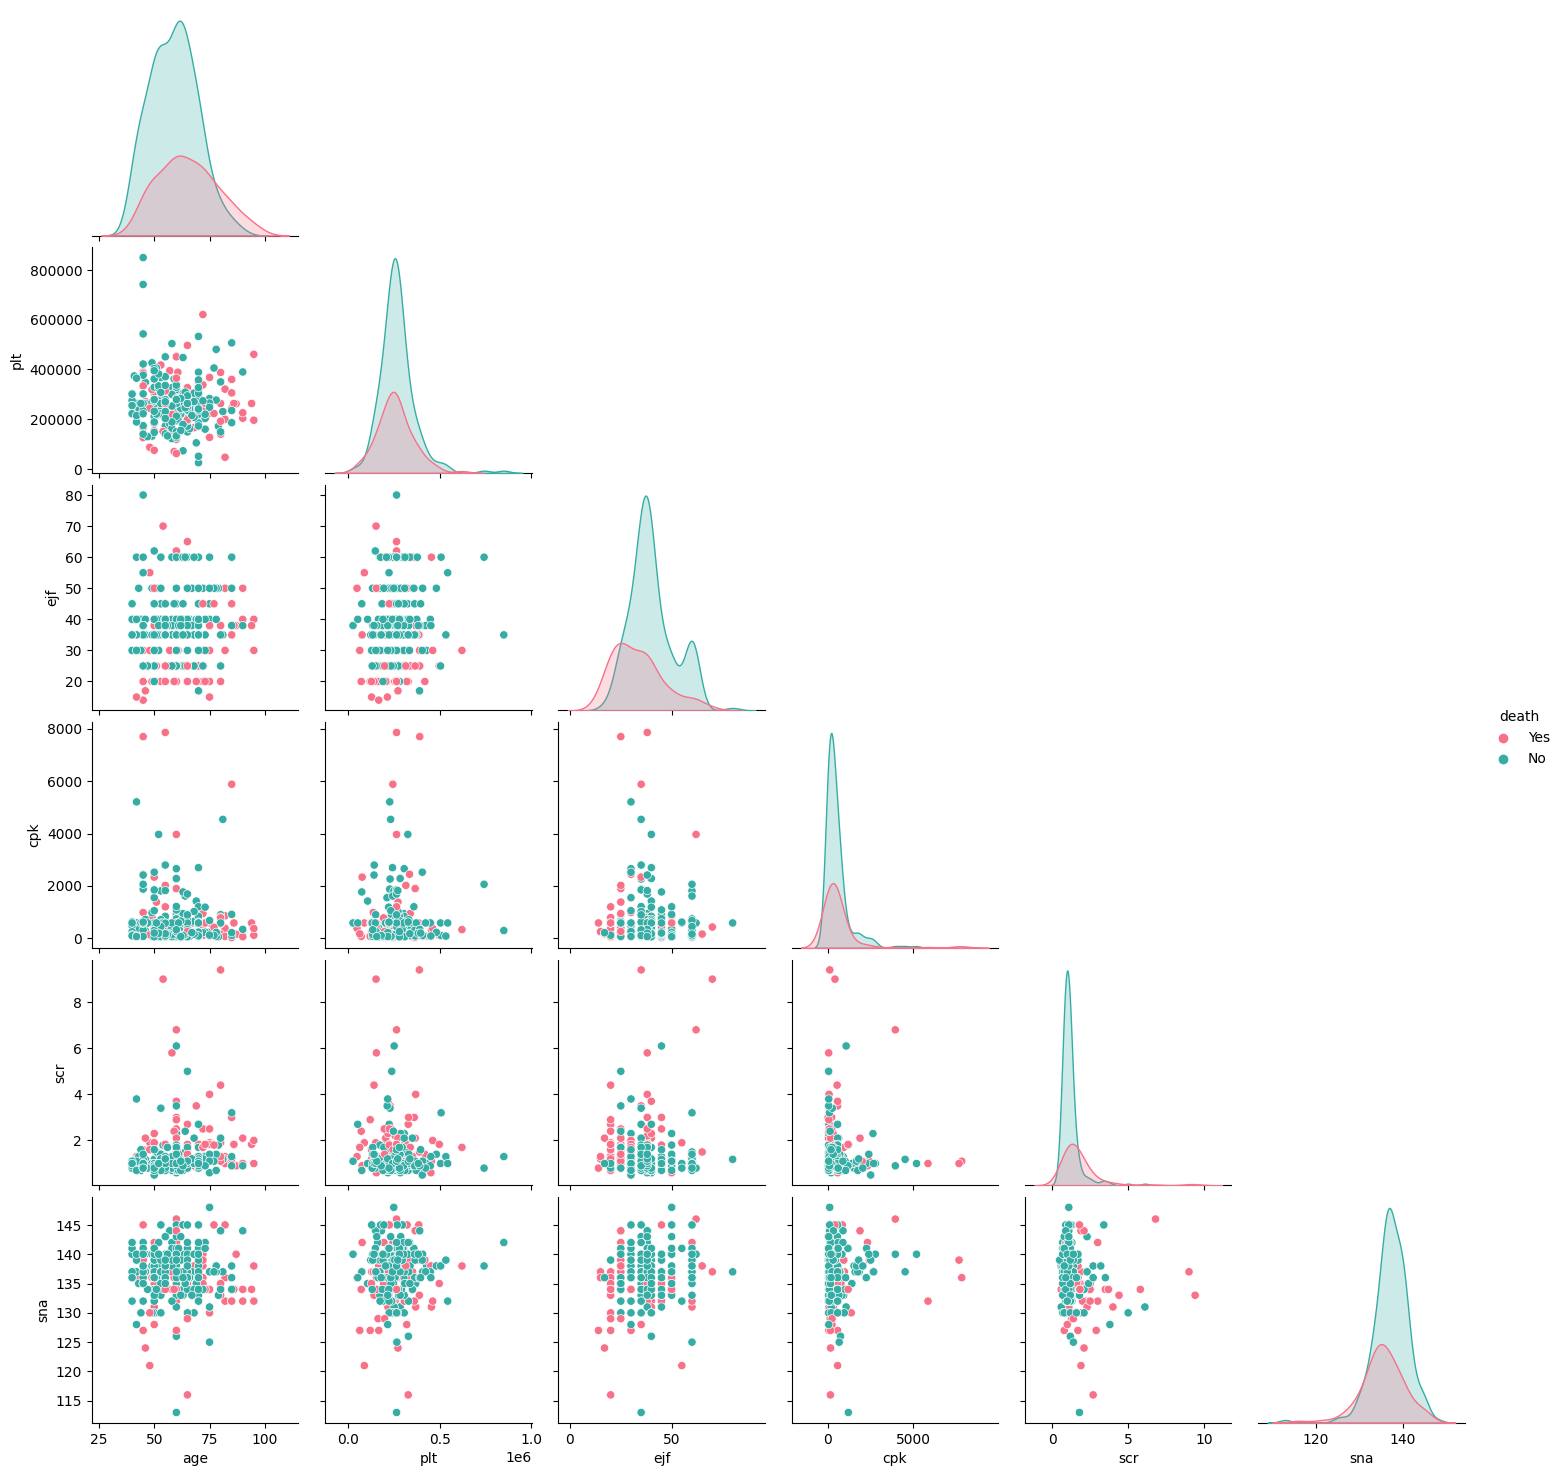

In [19]:
'pair_plot'
'數值特徵 之間的關係'
sns.pairplot(df[['age', 'plt', 'ejf', 'cpk', 'scr', 'sna', 'death']], 
             hue='death', palette='husl', corner=True)
'大多數在心力衰竭後死亡的患者的 射血分數(ejf) 似乎低於那些倖存下來的患者。'
'他們的 血清肌酐(scr) 和 肌酸磷酸激酶水平(cpk) 似乎也略高。死亡的個案處於 80 歲上下'


In [21]:
'相關係數'
print(df[['age', 'plt', 'ejf', 'cpk', 'scr', 'sna']].corr(method='spearman'))
'相關係數適度鼓勵為 (年齡 age, 血清肌酐 scr ) 和 (血清肌酐 scr, 血清鈉 sna )'
'隨著 年齡 age 的增長，血清肌酐 scr 含量增加，它們之間的輕微 正相關關係'
'慢性腎病的情況下，血清鈉 sna 與 血清肌酐 scr 的比率很高，兩者之間存在負相關關係，也意味著患者腎臟問題的普遍性'




          age       plt       ejf       cpk       scr       sna
age  1.000000 -0.052091  0.074047 -0.093078  0.270561 -0.101716
plt -0.052091  1.000000  0.053696  0.060033 -0.051028  0.049453
ejf  0.074047  0.053696  1.000000 -0.067839 -0.177986  0.161695
cpk -0.093078  0.060033 -0.067839  1.000000 -0.049936  0.016886
scr  0.270561 -0.051028 -0.177986 -0.049936  1.000000 -0.300413
sna -0.101716  0.049453  0.161695  0.016886 -0.300413  1.000000


'慢性腎病的情況下，血清鈉 sna 與 血清肌酐 scr 的比率很高，兩者之間存在負相關關係，也意味著患者腎臟問題的普遍性'

'Many of the deceased were anemic(貧血的) and diabetic(糖尿病患者) as well'

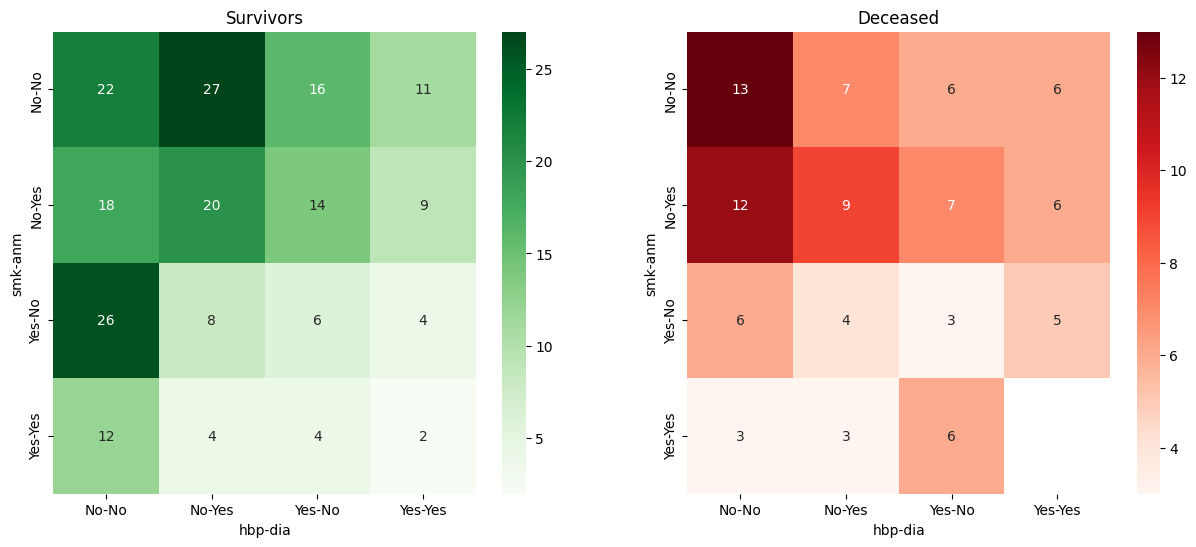

In [22]:
'分類特徵 之間的關係'
lifestyle_surv = pd.pivot_table(df.loc[df.death=='No'], 
                                values='chk', 
                                columns=['hbp','dia'], 
                                index=['smk','anm'], 
                                aggfunc=np.sum)

lifestyle_dead = pd.pivot_table(df.loc[df.death=='Yes'], 
                                values='chk', 
                                columns=['hbp','dia'], 
                                index=['smk','anm'], 
                                aggfunc=np.sum)

fig, ax= plt.subplots(1, 2, figsize=[15,6])
sns.heatmap(lifestyle_surv, cmap='Greens', annot=True, ax=ax[0])
ax[0].set_title('Survivors')

sns.heatmap(lifestyle_dead, cmap='Reds', annot=True, ax=ax[1])
ax[1].set_title('Deceased')
'Many of the survivors were either only smokers or only diabetic(糖尿病).'
'Many of the deceased were anemic(貧血的) and diabetic(糖尿病患者) as well'



% of heart failure patients who died = 0.3210702341137124
% of heart failure patients who survived = 0.6789297658862876


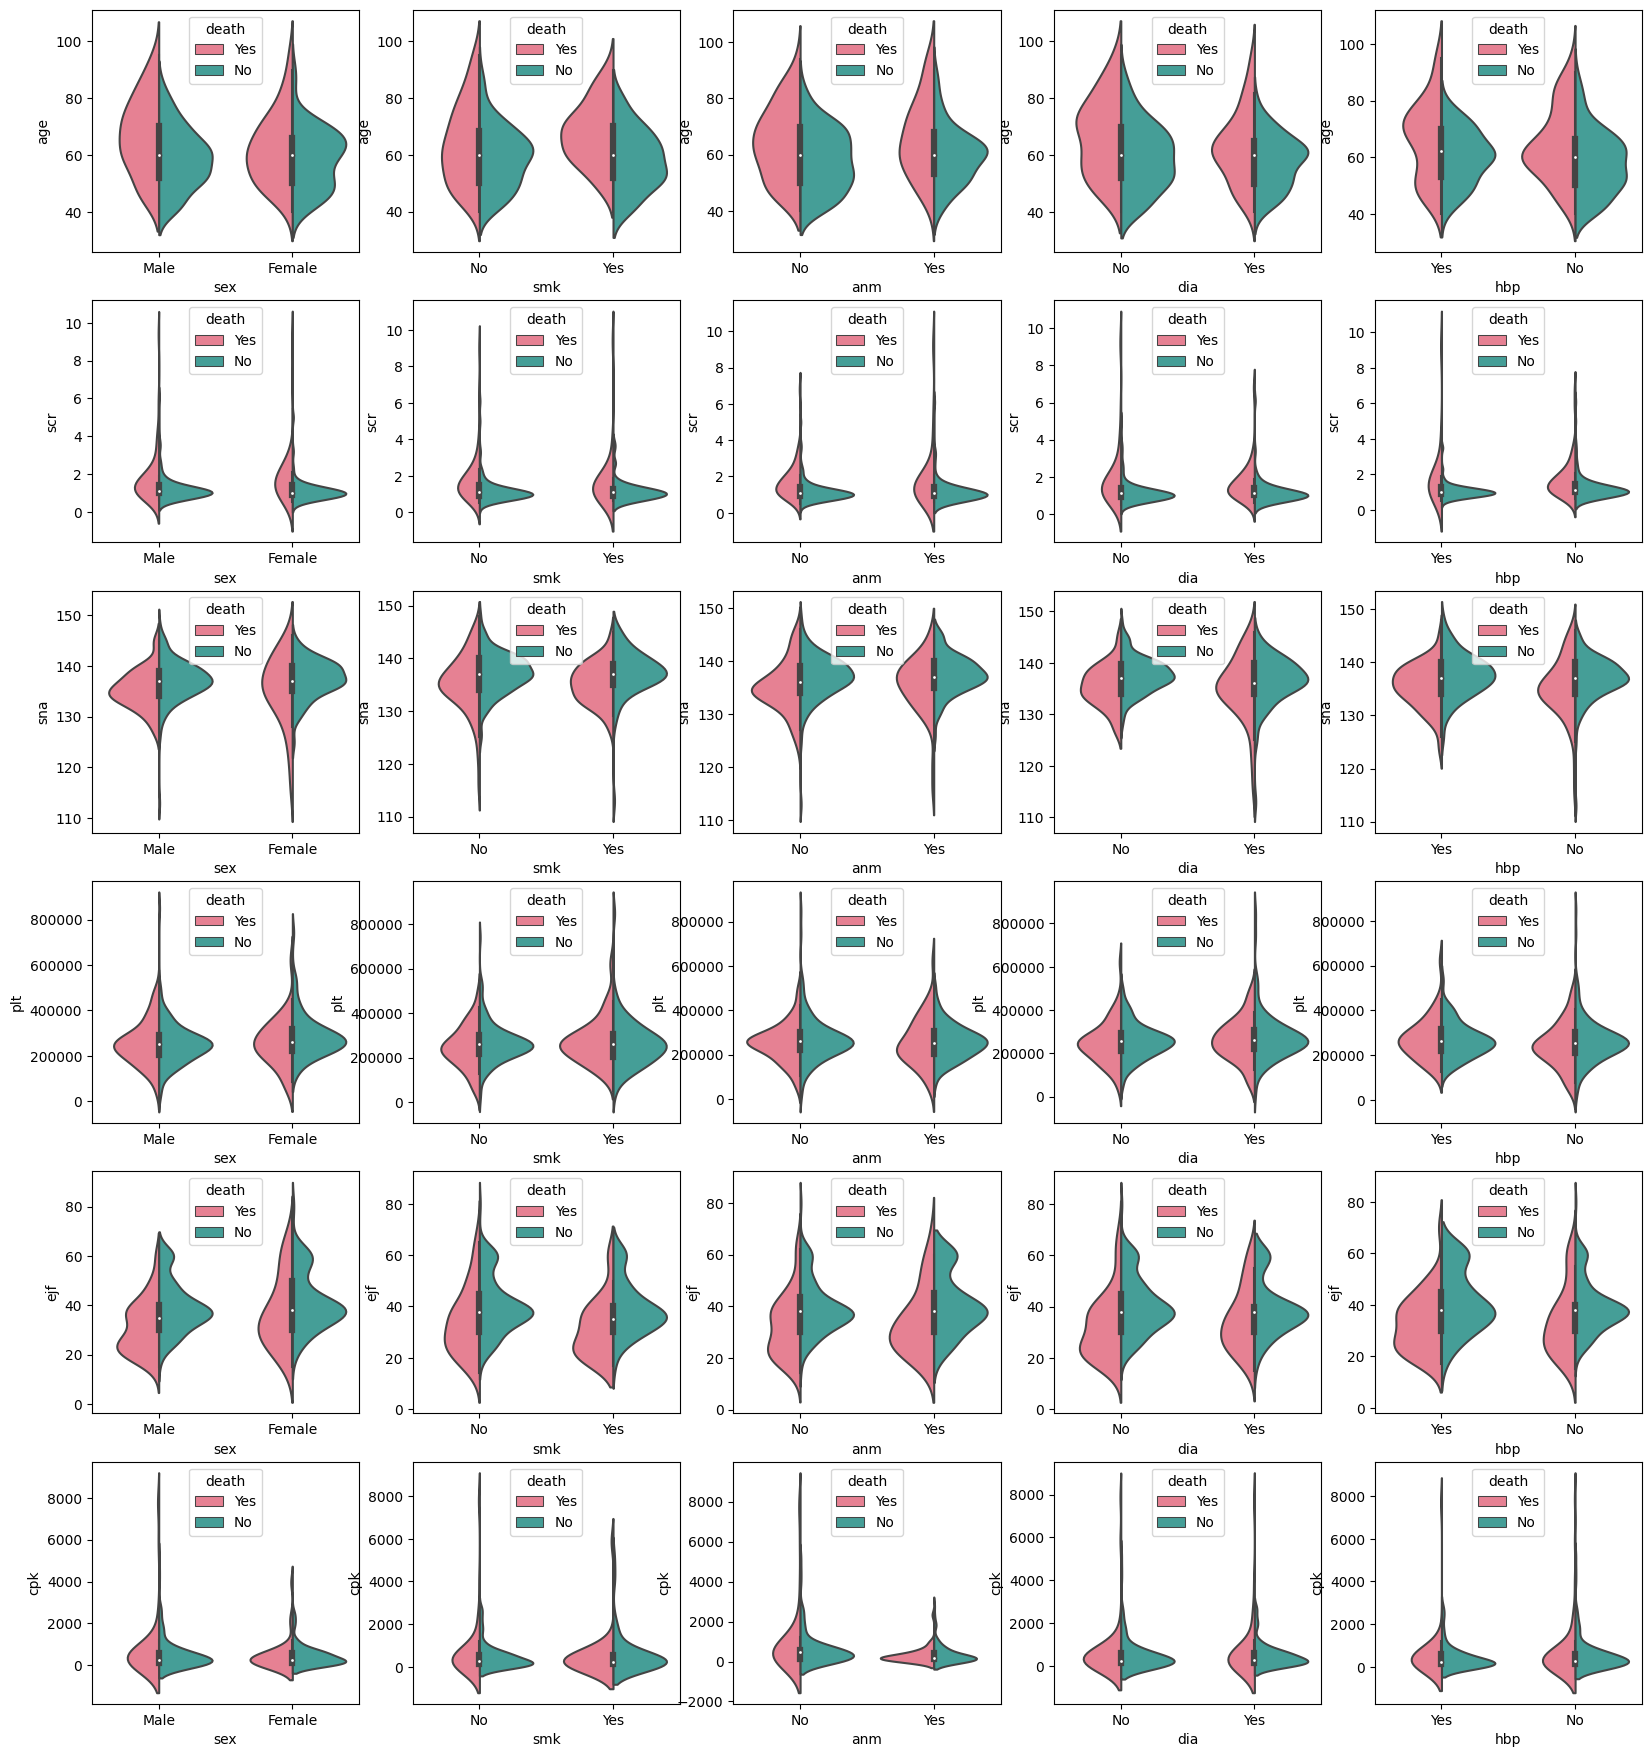

In [23]:
'所有特徵 之間的關係'
'violinplot'
fig,ax = plt.subplots(6, 5, figsize=[20,22]) 
cat_features = ['sex','smk','anm', 'dia', 'hbp'] 
num_features = ['age', 'scr', 'sna', 'plt', 'ejf', 'cpk'] 

for i in range(0,6): 
    for j in range(0,5): 
        sns.violinplot(data = df, x = cat_features[j], y=num_features[i], hue ='death', 
                       split=True, palette='husl', facet_kws={'despine':False}, ax=ax[i,j]) 
        ax[i ,j].legend(title='death', loc='upper center')
'性別：在死亡患者中，男性 的 射血分數(ejection) 似乎低於(lower) 女性 。此外，男性 的 肌酐磷酸激酶(creatinine phosphokinase) 似乎高於((higher) 女性'

'吸煙:(Deceased)死亡的吸煙(somrk)者的射血分數(ejection) 略低於(lower) 死亡的非吸煙者(dissmork)。'
'     (Survivors)倖存的吸煙者的肌酐磷酸激酶(creatinine phosphokinase) 水平似乎 高於(higher) 倖存的非吸煙者。'

'貧血：貧血患者往往具有較低的(lower) 肌酐磷酸激酶水平(creatinine phosphokinase) and較高(higher) 的血清肌酐水平(serum creatinine)。'
'     貧血患者中，大部分死亡患者 射血分數(ejection)都很低'

'糖尿病患者的 鈉水平(sodium) 往往較低，倖存者跟死亡患者相比較，大部分死亡患者 射血分數(ejection)都很低'

'高血壓：與未患高血壓的已故患者相比，已故高血壓患者的 射血分數(ejection) 似乎顯示出更大的變化'


print('% of heart failure patients who died = {}'.format(df.death.value_counts(normalize=True)[1]))
print('% of heart failure patients who survived = {}'.format(df.death.value_counts(normalize=True)[0]))



In [24]:
'''cat_feat = df[['sex', 'smk', 'dia', 'hbp', 'anm']]
num_feat = df[['age', 'plt', 'ejf', 'cpk', 'scr', 'sna']]
predictors = pd.concat([cat_feat, num_feat],axis=1)
concat資料合併

target = df['death']
predictors = pd.concat([target, num_feat],axis=1)'''



df['death'] = df['death'].apply(lambda x: 1 if x=='No' else 2)
x = df[['age', 'plt', 'ejf', 'cpk', 'scr', 'sna']].values
y = df['death'].values
'y = target'

'y = target'

# 資料分割

In [25]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)


# 特徵縮放

In [26]:
'特徵縮放'

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


'''scaled_feat = pd.DataFrame(scaler.fit_transform(x.values), columns = x.columns)'''

'scaled_feat = pd.DataFrame(scaler.fit_transform(x.values), columns = x.columns)'

# 建模與訓練_LogisticRegression

In [27]:
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# 模型評估_LogisticRegression

In [28]:

lr.score(x_train,y_train)
lr.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6888888888888889


[[55  6]
 [22  7]]


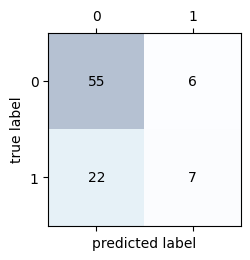

In [29]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, 
                s=confmat[i, j], 
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [30]:
kfold = StratifiedKFold(n_splits=10).split(x_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    lr.fit(x_train[train], y_train[train])
    score = lr.score(x_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [  0 128  60], Acc: 0.619
Fold:  2, Class dist.: [  0 128  60], Acc: 0.667
Fold:  3, Class dist.: [  0 128  60], Acc: 0.762
Fold:  4, Class dist.: [  0 128  60], Acc: 0.762
Fold:  5, Class dist.: [  0 128  60], Acc: 0.810
Fold:  6, Class dist.: [  0 128  60], Acc: 0.714
Fold:  7, Class dist.: [  0 128  60], Acc: 0.857
Fold:  8, Class dist.: [  0 127  61], Acc: 0.905
Fold:  9, Class dist.: [  0 127  61], Acc: 0.810
Fold: 10, Class dist.: [  0 128  61], Acc: 0.900

CV accuracy: 0.780 +/- 0.090


In [31]:

scores = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.780 +/- 0.090


In [33]:
lr = make_pipeline(LogisticRegression(C=1.0, penalty='l2', random_state=1, solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=lr, 
                                                        X=x_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

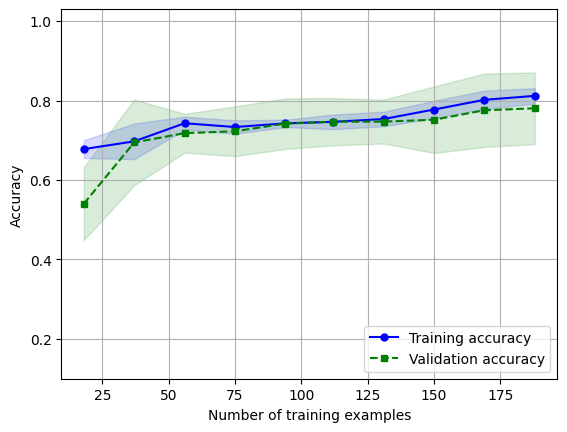

In [34]:
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', markersize=5, 
         label='Training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std, 
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1, 1.03])
plt.show()
